In [2]:
import numpy as np
data=np.load('C:/Users/hp/data.npy')
target=np.load('C:/Users/hp/target.npy')

#loading the save numpy arrays in the previous code

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 97s 98ms/step - loss: 0.7278 - accuracy: 0.5364 - val_loss: 0.6657 - val_accuracy: 0.5645
Epoch 2/20
990/990 [==============================] - 86s 87ms/step - loss: 0.6060 - accuracy: 0.6596 - val_loss: 0.5283 - val_accuracy: 0.7944
Epoch 3/20
990/990 [==============================] - 86s 87ms/step - loss: 0.4556 - accuracy: 0.7808 - val_loss: 0.3300 - val_accuracy: 0.9032
Epoch 4/20
990/990 [==============================] - 86s 87ms/step - loss: 0.3340 - accuracy: 0.8717 - val_loss: 0.3065 - val_accuracy: 0.9032
Epoch 5/20
990/990 [==============================] - 86s 87ms/step - loss: 0.2316 - accuracy: 0.9162 - val_loss: 0.1910 - val_accuracy: 0.9476
Epoch 6/20
990/990 [==============================] - 86s 87ms/step - loss: 0.1989 - accuracy: 0.9293 - val_loss: 0.1562 - val_accuracy: 0.9435
Epoch 7/20
990/990 [======================

In [6]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

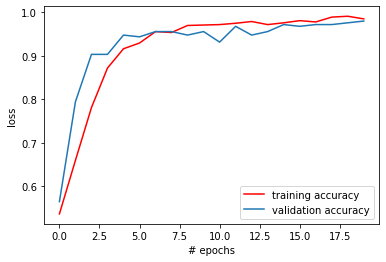

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 4s 28ms/step
[0.17617305690773588, 0.9637681245803833]
